Weight Initialization
======

## 1. Problem occuring during training Neural Network

####  Vanishing Gradient 
MLP 를 학습시키는 방법인 Backpropagation 중 Gradient 항이 사라지는 문제 입니다. 이 항이 0이나 0에 가까워져 학습이 불가능해지는 현상

## 2. How to solve Vanishing Gradient?

#### 1) Activation Function
Vanishing Gradient 현상은 Activation Function 의 변경을 통해 어느정도 보완할 수 있게 되었습니다. 

### 2) Weight Initialization
***아니면 처음부터 weight 값들이 최적의 값들이라면 gradient 가 작아지더라도 훌륭한 모델이 생성될 수 있겠지요.***  
***또한 처음부터 weight 값들이 최적의 값들이라면 학습횟수가 많지 않아도 훌륭한 모델을 만들 수 있을 것입니다.***

## 3. Various types of Activation functions and Weight Initialization Methods

Weight Initialization | Activation functions
----------------------|--------------------
Xavier(Glorot)|tanh, sigmoid, softmax
He| ReLU, Leacky ReLU, PReLU, ELU
LeCun | SELU

### Reference : https://gomguard.tistory.com/183


In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.noise import AlphaDropout
from keras.preprocessing.text import Tokenizer

max_words = 1000
batch_size = 16
epochs = 40
plot = True

In [ ]:
def create_network(n_dense=6,
                   dense_units=16,
                   activation='selu',
                   dropout=AlphaDropout,
                   dropout_rate=0.1,
                   kernel_initializer='lecun_normal',
                   optimizer='adam',
                   num_classes=1,
                   max_words=max_words):
    model = Sequential()
    model.add(Dense(dense_units, input_shape=(max_words,),
                    kernel_initializer=kernel_initializer))
    model.add(Activation(activation))
    model.add(dropout(dropout_rate))

    for i in range(n_dense - 1):
        model.add(Dense(dense_units, kernel_initializer=kernel_initializer))
        model.add(Activation(activation))
        model.add(dropout(dropout_rate))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [ ]:
network1 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'relu',
    'dropout': Dropout,
    'dropout_rate': 0.5,
    'kernel_initializer': 'glorot_uniform',
    'optimizer': 'sgd'
}

In [ ]:
network2 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'selu',
    'dropout': AlphaDropout,
    'dropout_rate': 0.1,
    'kernel_initializer': 'lecun_normal',
    'optimizer': 'sgd'
}

In [17]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
8982 train sequences
2246 test sequences


In [18]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [19]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [20]:
print('\nBuilding network 1...')

model1 = create_network(num_classes=num_classes, **network1)
history_model1 = model1.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model1 = model1.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


Building network 1...
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 346us/step - loss: 3.3034 - acc: 0.3298 - val_loss: 2.7531 - val_acc: 0.3315
Epoch 2/40
8083/8083 [==============================] - 2s 287us/step - loss: 2.6839 - acc: 0.3501 - val_loss: 2.5462 - val_acc: 0.3315
Epoch 3/40
8083/8083 [==============================] - 2s 291us/step - loss: 2.5597 - acc: 0.3522 - val_loss: 2.4776 - val_acc: 0.3315
Epoch 4/40
8083/8083 [==============================] - 2s 286us/step - loss: 2.4695 - acc: 0.3495 - val_loss: 2.3577 - val_acc: 0.3315
Epoch 5/40
8083/8083 [==============================] - 2s 298us/step - loss: 2.3729 - acc: 0.3587 - val_loss: 2.2314 - val_acc: 0.3315
Epoch 6/40
8083/8083 [==============================] - 2s 298us/step - loss: 2.3016 - acc: 0.3927 - val_loss: 2.1690 - val_acc: 0.4894
Epoch 7/40
8083/8083 [==============================] - 2s 295us/step - loss: 2.2521 - acc: 0.4156 - val_loss: 2.1

In [21]:
print('\nBuilding network 2...')
model2 = create_network(num_classes=num_classes, **network2)

history_model2 = model2.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model2 = model2.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


Building network 2...
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 416us/step - loss: 2.7966 - acc: 0.3024 - val_loss: 2.5832 - val_acc: 0.3315
Epoch 2/40
8083/8083 [==============================] - 3s 338us/step - loss: 2.3766 - acc: 0.3775 - val_loss: 2.1424 - val_acc: 0.4605
Epoch 3/40
8083/8083 [==============================] - 3s 336us/step - loss: 2.1653 - acc: 0.4436 - val_loss: 1.9621 - val_acc: 0.5083
Epoch 4/40
8083/8083 [==============================] - 3s 336us/step - loss: 2.0299 - acc: 0.4841 - val_loss: 1.9068 - val_acc: 0.5506
Epoch 5/40
8083/8083 [==============================] - 3s 337us/step - loss: 1.9504 - acc: 0.5079 - val_loss: 1.8446 - val_acc: 0.5628
Epoch 6/40
8083/8083 [==============================] - 3s 347us/step - loss: 1.8942 - acc: 0.5207 - val_loss: 1.8339 - val_acc: 0.5673
Epoch 7/40
8083/8083 [==============================] - 3s 344us/step - loss: 1.8528 - acc: 0.5260 - val_loss: 1.8

In [22]:
print('\nNetwork 1 results')
print('Hyperparameters:', network1)
print('Test score:', score_model1[0])
print('Test accuracy:', score_model1[1])
print('Network 2 results')
print('Hyperparameters:', network2)
print('Test score:', score_model2[0])
print('Test accuracy:', score_model2[1])



Network 1 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'relu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0.5, 'kernel_initializer': 'glorot_uniform', 'optimizer': 'sgd'}
Test score: 2.059647047190611
Test accuracy: 0.5329474621814803
Network 2 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'selu', 'dropout': <class 'keras.layers.noise.AlphaDropout'>, 'dropout_rate': 0.1, 'kernel_initializer': 'lecun_normal', 'optimizer': 'sgd'}
Test score: 1.6467193957428155
Test accuracy: 0.650044523650583


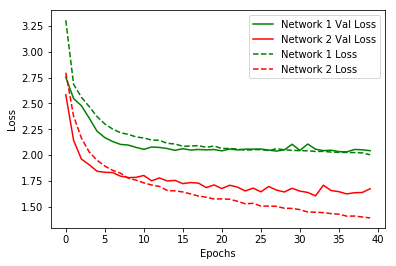

In [23]:
plt.plot(range(epochs),
         history_model1.history['val_loss'],
         'g-',
         label='Network 1 Val Loss')
plt.plot(range(epochs),
         history_model2.history['val_loss'],
         'r-',
         label='Network 2 Val Loss')
plt.plot(range(epochs),
         history_model1.history['loss'],
         'g--',
         label='Network 1 Loss')
plt.plot(range(epochs),
         history_model2.history['loss'],
         'r--',
         label='Network 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Activation functions
====

### Reference : https://m.blog.naver.com/wideeyed/221017173808

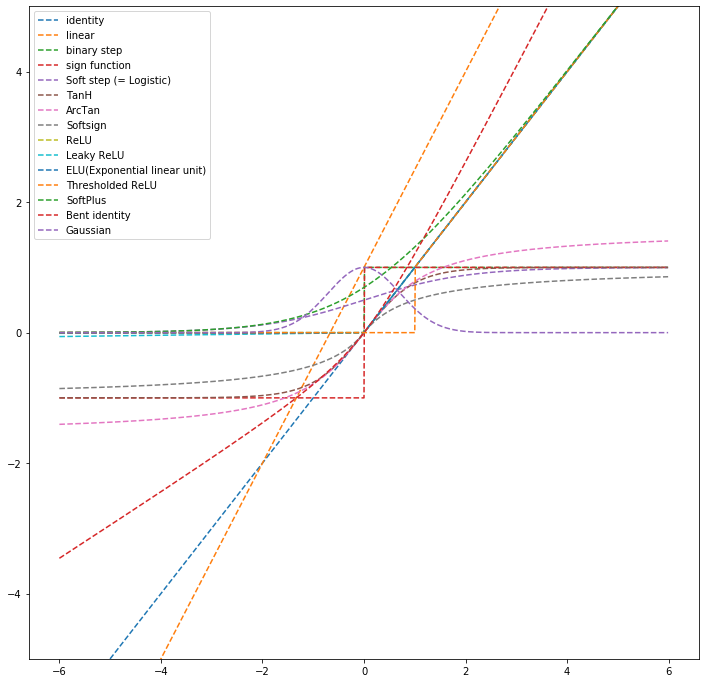

In [4]:
import numpy as np
import matplotlib.pylab as plt
 
x = np.arange(-6, 6, 0.01)

plt.figure(figsize=(12,12))
 
 
#######################################################
# 선형함수들
#######################################################
def identity_func(x): # 항등함수
    return x

plt.plot(x, identity_func(x), linestyle='--', label="identity")
 
 
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능

plt.plot(x, linear_func(x), linestyle='--', label="linear")
 
 
#######################################################
# 계단함수들
#######################################################
def binarystep_func(x): # 계단함수
    return (x>=0)*1
 
plt.plot(x, binarystep_func(x), linestyle='--', label="binary step")
 
 
def sgn_func(x): # 부호함수(sign function)
    return (x>=0)*1 + (x<=0)*-1
 
plt.plot(x, sgn_func(x), linestyle='--', label="sign function")
 
 
#######################################################
# Sigmoid계열
#######################################################
 
def softstep_func(x): # Soft step (= Logistic), 시그모이드(Sigmoid, S자모양) 대표적인 함수
    return 1 / (1 + np.exp(-x))
 
plt.plot(x, softstep_func(x), linestyle='--', label="Soft step (= Logistic)")
 
    
def tanh_func(x): # TanH 함수
    return np.tanh(x)
    # return 2 / (1 + np.exp(-2*x)) - 1 # same
 
plt.plot(x, tanh_func(x), linestyle='--', label="TanH")
 
 
def arctan_func(x): # ArcTan 함수
    return np.arctan(x)
 
plt.plot(x, arctan_func(x), linestyle='--', label="ArcTan")
 
 
def softsign_func(x): # Softsign 함수
    return x / ( 1+ np.abs(x) )
 
plt.plot(x, softsign_func(x), linestyle='--', label="Softsign")
 
 
 
#######################################################
# ReLU계열
#######################################################
 
def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return (x>0)*x
    # return np.maximum(0,x) # same
 
plt.plot(x, relu_func(x), linestyle='--', label="ReLU")
 
 
def leakyrelu_func(x): # Leaky ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return (x>=0)*x + (x<0)*0.01*x # 알파값(보통 0.01) 조정가능
    # return np.maximum(0.01*x,x) # same
 
plt.plot(x, leakyrelu_func(x), linestyle='--', label="Leaky ReLU")
 
 
def elu_func(x): # ELU(Exponential linear unit)
    return (x>=0)*x + (x<0)*0.01*(np.exp(x)-1)
 
plt.plot(x, elu_func(x), linestyle='--', label="ELU(Exponential linear unit)")
 
 
def trelu_func(x): # Thresholded ReLU
    return (x>1)*x # 임계값(1) 조정 가능
 
plt.plot(x, trelu_func(x), linestyle='--', label="Thresholded ReLU")
 
 
 
#######################################################
# 기타계열
#######################################################
 
def softplus_func(x): # SoftPlus 함수
    return np.log( 1 + np.exp(x) )
 
plt.plot(x, softplus_func(x), linestyle='--', label="SoftPlus")
 
 
def bentidentity_func(x): # Bent identity
    return (np.sqrt(x*x+1)-1)/2+x
 
plt.plot(x, bentidentity_func(x), linestyle='--', label="Bent identity")
 
 
def gaussian_func(x): # Gaussian
    return np.exp(-x*x)
 
plt.plot(x, gaussian_func(x), linestyle='--', label="Gaussian")
 
#plt.plot(x, y_identity, 'r--', x, relu_func(x), 'b--', x, softstep_func(x), 'g--')
plt.ylim(-5, 5)
plt.legend()
plt.show()

Batch Normalization
=====

##1. Internal Covariance Shift  
각 layer마다 distribution이 달라져 학습하는 데 어려움이 발생.  
layer를 거칠 때마다 분포가 같으면 weight값만 조정해주면 되는데....
이를 위해 layer의 distribution을 맞춰출 필요가 있음. 


##2. 배치 정규화는 각 층의 출력값들을 정규화하는 방법

##3. Algorithm
1. $\mu$ = $\frac 1 m$ $\sum x_i$   
  
  
2. $\sigma_B^2$ = $\frac 1 m$ $\sum(x_i - \mu_B)^2$   
  
  
3. $\hat{x_i}$ = $\frac {x_i - \mu_B} {\sqrt{\sigma_B^2 + \epsilon}}$
  
    
4. $y_i$ = $\gamma\hat{x_i}$ + $\beta$

## 4. 특징
- weight initialization이 weight에 대한 processing이라면 batch normalization은 data에 대한 processing이다.    


- batch normalization이 학습할 parameter는 2개! $\gamma, \beta$ 
 
- batch normalization을 쓰면 bias를 포함할 필요가 없음!! 첫 layer부터 이미지를 알아서 평균이랑 분산을 구해서 정규화시켜 넘어감. 이후에는 layer마다 batch normalization 적용해줘야 함!  

- 학습 시에는 배치마다 평균과 분산을 구해줘야 한다. 
하지만 inference 시에는 mini-batch의 값들을 이용하는 대신 지금까지 본 전체 데이터를 다 사용한다는 느낌으로, training 할 때 현재까지 본 input들의 이동평균
(moving average) 및 unbiased variance estimate의 이동평균을
계산하여 저장해놓은 뒤 이 값으로 normalize를 한다. 마지막에 gamma와 beta를 이용하여 scale/shift 해주는 것은 동일하다.
- batch normalization을 쓰면 학습이 잘 되있어 learning rate를 더 크게 줄 수 있다는 장점이 있다.  
- batch - convolution - activation 반복 후 fully-connected - activation - dropout 순서로 진행한다. 

## 5. 장점
1. 기존 Deep Network에서는 learning rate를 너무 높게 잡을 경우
gradient가 explode/vanish 하거나, 나쁜 local minima에 빠지는 문제가
있었다.
2. 이는 parameter들의 scale 때문인데, Batch Normalization을 사용할
경우 propagation 할 때 parameter의 scale에 영향을 받지 않게 된다.
3. 따라서, learning rate를 크게 잡을 수 있게 되고 이는 빠른 학습을
가능케 한다.

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_29 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_31 (Dense)             (None, 10)               

Dropout
====
- overfitting을 방지할 수 있는 방법  
- 일반적으로 마지막 3개의 layer에만 dropout 적용하며 출력 layer에는 dropout 적용하지 않음

### Mote Carlo Dropout
반복 훈련 후 나오는 값의 평균을 예측값으로 선택하는 방식으로 test의 성능을 높힐 수 있음

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)               